In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15ba41e6d88>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1}

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

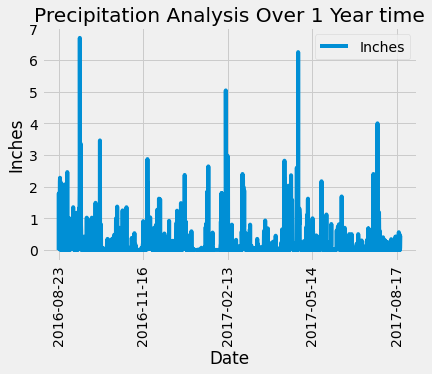

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
precipt_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-24").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prect_df = pd.DataFrame(precipt_data).set_index(0)
# Sort the dataframe by date
prect_df=prect_df.sort_values(by=0).dropna()
prect_df=prect_df.rename(columns={1:'Inches'})
prect_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
prect_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis Over 1 Year time")
plt.show()

In [82]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prect_df.describe()

,Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15ba666ad88>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [85]:
# Design a query to calculate the total number stations in the dataset
getStationCount = session.query(Station.id).count()
print(f'There are {getStationCount} recorded stations')

There are 9 recorded stations


In [91]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_data = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.

most_active = 'USC00519281'
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

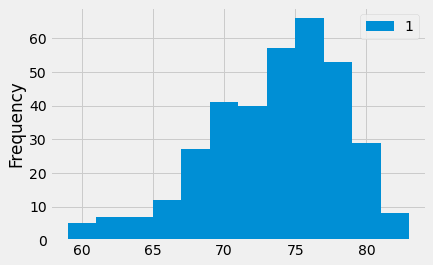

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-24").filter(Measurement.station == most_active).all()

stations_df = pd.DataFrame(year_data)

stations_df.plot.hist(bins=12)


# Close session

In [16]:
# Close Session
session.close()